In [1]:
# Importing the libraries

# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Important sklearn libraries 
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor, AdaBoostRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

In [2]:
# Importing the data
data = pd.read_excel('airline_dataset.xlsx')

# Data Sample
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
# Dimensions of data
data.shape

(10683, 11)

In [4]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


# Preprocessing

In [5]:
# Checking for duplicated values
data.duplicated().sum()

220

In [6]:
# Checking for null values
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Dropping duplicated and null values
data_no_duplies = data.drop_duplicates(keep='first')

data_no_duplies.dropna(inplace=True)

In [8]:
data_no_duplies.shape

(10462, 11)

In [9]:
# Checking for airlines in the dataset
data_no_duplies['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [10]:
# Seperating day, month and year form 'Date_of_Journey'
data_no_duplies['journey_day'] = pd.to_datetime(data_no_duplies.Date_of_Journey, format='%d/%m/%Y').dt.day
data_no_duplies['journey_month'] = pd.to_datetime(data_no_duplies.Date_of_Journey, format='%d/%m/%Y').dt.month
data_no_duplies['journey_year'] = pd.to_datetime(data_no_duplies.Date_of_Journey, format='%d/%m/%Y').dt.year

In [11]:
# Checking the information of the new dataset
data_no_duplies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  journey_day      10462 non-null  int32 
 12  journey_month    10462 non-null  int32 
 13  journey_year     10462 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.1+ MB


In [12]:
# Checking for the number of years
data_no_duplies['journey_year'].value_counts() 

journey_year
2019    10462
Name: count, dtype: int64

In [13]:
# Seperating hours and minutes from 'Dep_Time' and 'Arrival_Time'

# 'Dep_Time' into hours and minutes
data_no_duplies['Dep_hour'] = pd.to_datetime(data_no_duplies['Dep_Time']).dt.hour
data_no_duplies['Dep_minute'] = pd.to_datetime(data_no_duplies['Dep_Time']).dt.minute

# 'Arrival_Time' into hours and minutes
data_no_duplies['Arrival_hour'] = pd.to_datetime(data_no_duplies['Arrival_Time']).dt.hour
data_no_duplies['Arrival_minute'] = pd.to_datetime(data_no_duplies['Arrival_Time']).dt.minute

In [14]:
# Checking the information about the dataset
data_no_duplies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  object
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  journey_day      10462 non-null  int32 
 12  journey_month    10462 non-null  int32 
 13  journey_year     10462 non-null  int32 
 14  Dep_hour         10462 non-null  int32 
 15  Dep_minute       10462 non-null  int32 
 16  Arrival_hour     10462 non-null  int32 
 17  Arrival_minute   10462 non-null  int

In [15]:
# Now seperting hours and minutes in 'Duration'
duration = list(data_no_duplies['Duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + ' 0m'
        else:
            duration[i] = '0h ' + duration[i]

duration_hours = []
duration_minutes = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep='h')[0]))
    duration_minutes.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [16]:
# Creating new columns from 'Duration' 
data_no_duplies['Duration_hours'] = duration_hours
data_no_duplies['Duration_minutes'] = duration_minutes

In [17]:
# Checking the information about the columns
data_no_duplies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Date_of_Journey   10462 non-null  object
 2   Source            10462 non-null  object
 3   Destination       10462 non-null  object
 4   Route             10462 non-null  object
 5   Dep_Time          10462 non-null  object
 6   Arrival_Time      10462 non-null  object
 7   Duration          10462 non-null  object
 8   Total_Stops       10462 non-null  object
 9   Additional_Info   10462 non-null  object
 10  Price             10462 non-null  int64 
 11  journey_day       10462 non-null  int32 
 12  journey_month     10462 non-null  int32 
 13  journey_year      10462 non-null  int32 
 14  Dep_hour          10462 non-null  int32 
 15  Dep_minute        10462 non-null  int32 
 16  Arrival_hour      10462 non-null  int32 
 17  Arrival_minute   

In [18]:
# Dropping the columns to form a new dataset
data_1 = data_no_duplies.drop(['Date_of_Journey', 'Dep_Time', 'Arrival_Time', 'Duration', 'journey_year', 'Route', 'Additional_Info'], axis=1)

In [19]:
# Cheking the information about the new dataset
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10462 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10462 non-null  object
 1   Source            10462 non-null  object
 2   Destination       10462 non-null  object
 3   Total_Stops       10462 non-null  object
 4   Price             10462 non-null  int64 
 5   journey_day       10462 non-null  int32 
 6   journey_month     10462 non-null  int32 
 7   Dep_hour          10462 non-null  int32 
 8   Dep_minute        10462 non-null  int32 
 9   Arrival_hour      10462 non-null  int32 
 10  Arrival_minute    10462 non-null  int32 
 11  Duration_hours    10462 non-null  int64 
 12  Duration_minutes  10462 non-null  int64 
dtypes: int32(6), int64(3), object(4)
memory usage: 899.1+ KB


In [20]:
# Data Sample
data_1.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


# EDA

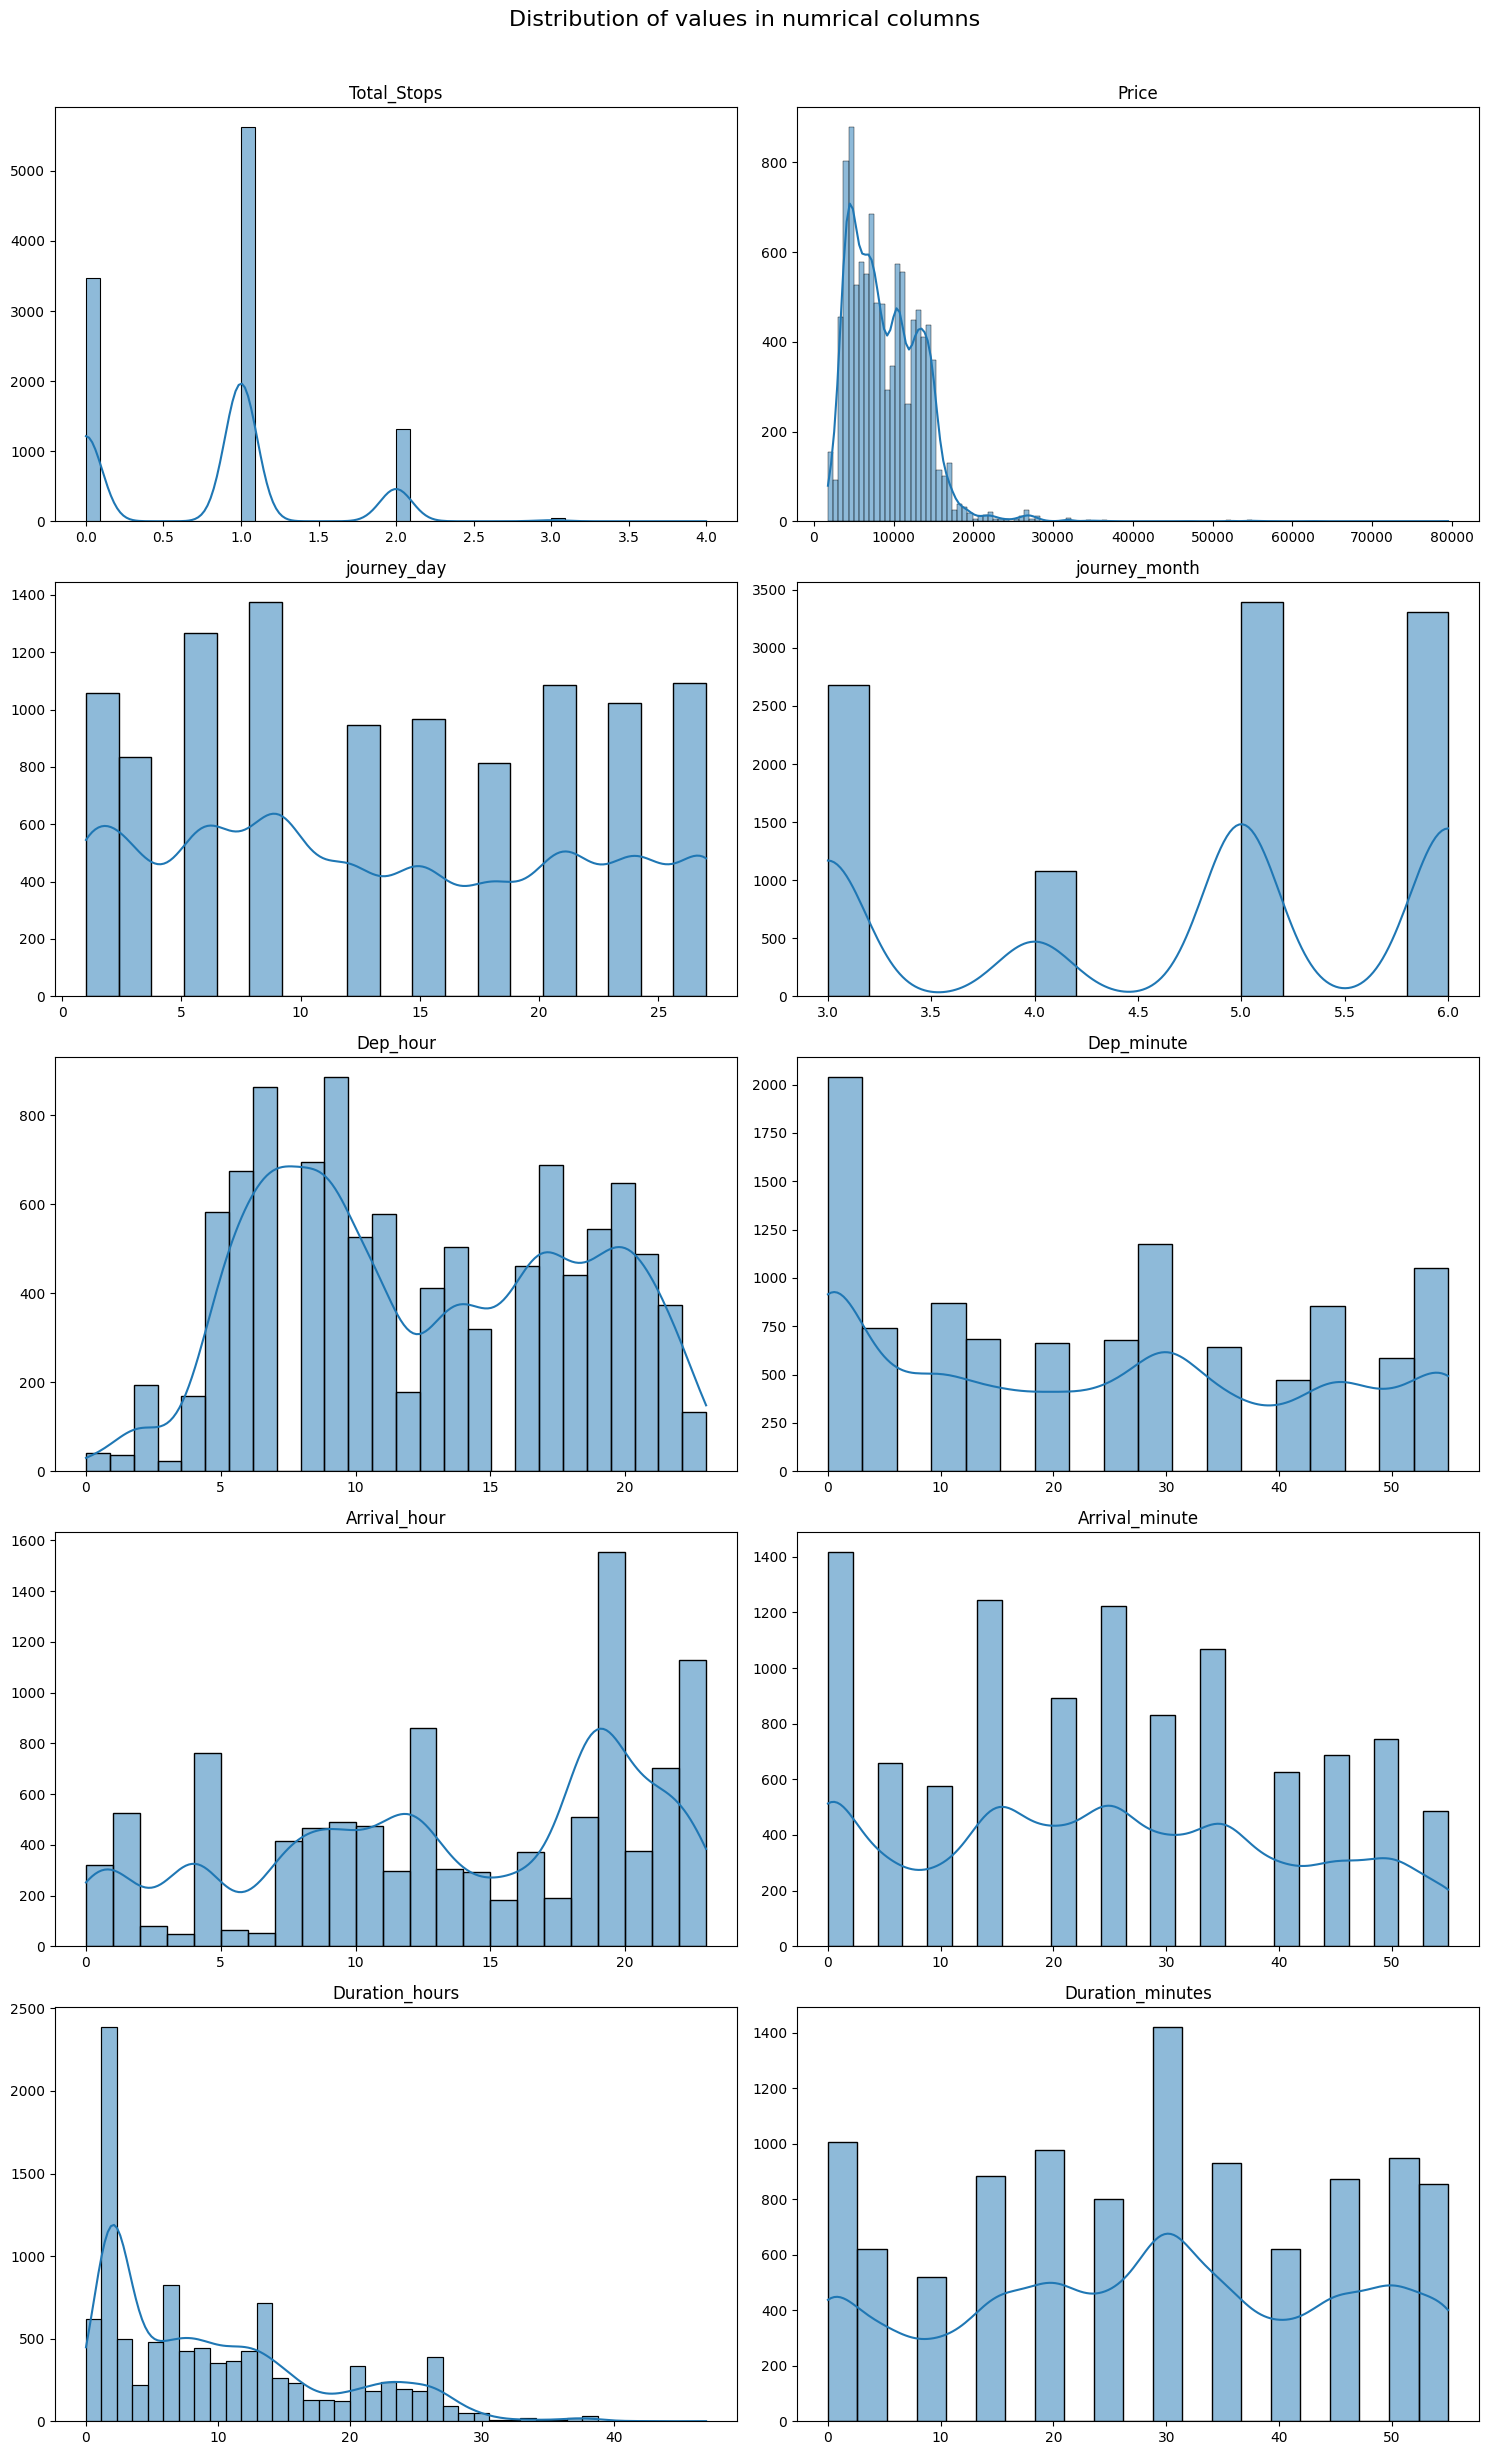

In [152]:
# Distribution of values in numrical columns
numerical_columns = data_1.select_dtypes(['int', 'float']).columns.tolist()

# Width and Height
num_of_plots_n = len(numerical_columns)
n_rows_num = int(np.ceil(num_of_plots_n / 2))

# Setting up subplots and it's axes
histplots, axes_num = plt.subplots(n_rows_num, 2, figsize=(15, 25))
histplots.suptitle('Distribution of values in numrical columns', fontsize=16)
axes_num = axes_num.flatten()

# Creating histplots
for i in range(len(numerical_columns)):
    ax_num = sns.histplot(data=data_1, x=numerical_columns[i], kde=True, ax=axes_num[i])
    ax_num.set_title(numerical_columns[i], fontsize=12)
    ax_num.set_xlabel('')
    ax_num.set_ylabel('')

# To remove empty axes in the plots
for j in range(len(numerical_columns), len(axes_num)):
    axes_num[j].axis('off')

# Setting the layout of the plot
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Saving the image
plt.savefig('images/Distribution_of_numerical_columns.png')

# Displaying the plot
plt.show()

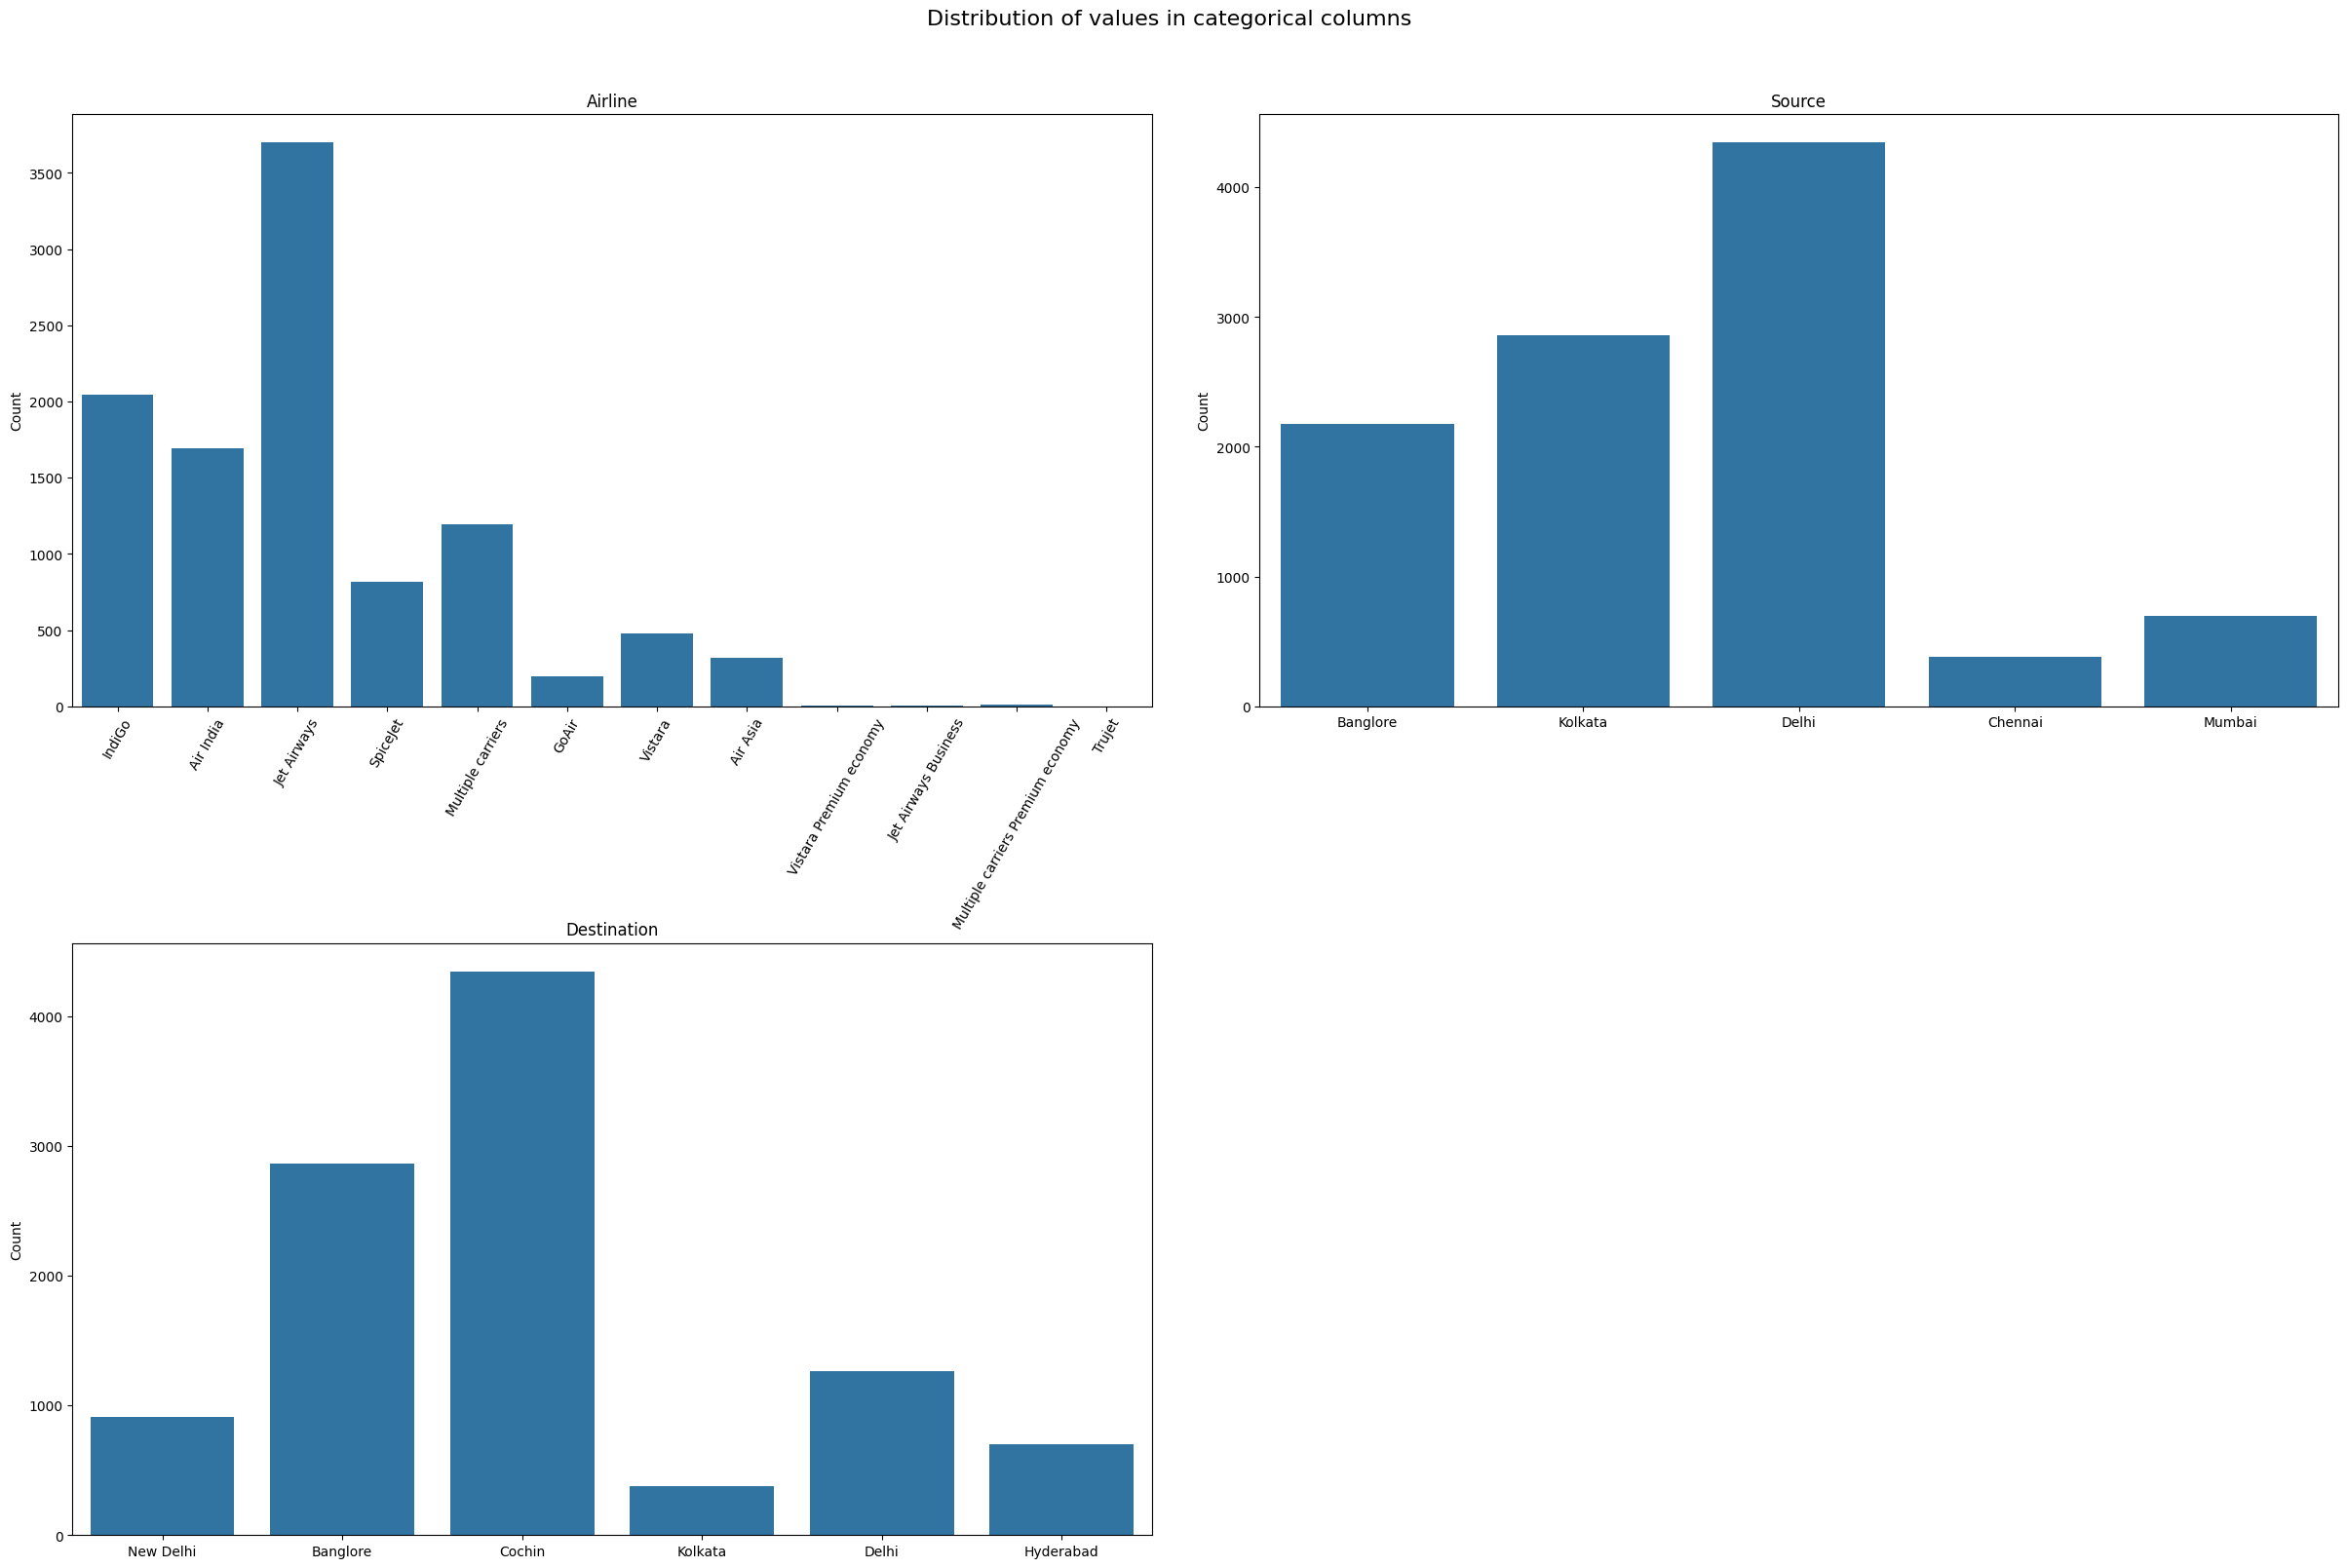

In [202]:
# Distribution of values in categorical columns
categorical_columns = data_1.select_dtypes(['object']).columns.tolist()

# Width and Height
num_of_plots_c = len(categorical_columns)
n_rows_cat = int(np.ceil(num_of_plots_c / 2))

# Setting up subplots and it's axes
countplots, axes_cat = plt.subplots(n_rows_cat, 2, figsize=(30, 18))
countplots.suptitle('Distribution of values in categorical columns', fontsize=16)
axes_cat = axes_cat.flatten()

# Creating countplots
for i in range(num_of_plots_c):
    ax_cat = sns.countplot(data=data_1, x=categorical_columns[i], ax=axes_cat[i])
    ax_cat.set_title(categorical_columns[i], fontsize=12)

    if categorical_columns[i] == 'Airline':
        ax_cat.tick_params(axis='x', rotation=60)

    ax_cat.set_xlabel('')
    ax_cat.set_ylabel('Count')

# To remove axes in the empty plots
for j in range(len(categorical_columns), len(axes_cat)):
    axes_cat[j].axis('off')

# Setting the layout of the plot
countplots.subplots_adjust(top=0.92, wspace=0.1, hspace=0.4)

# Saving the plot
plt.savefig('images/Distribution_of_categorical_columns.png', bbox_inches='tight')

# Displaying the plot
plt.show()

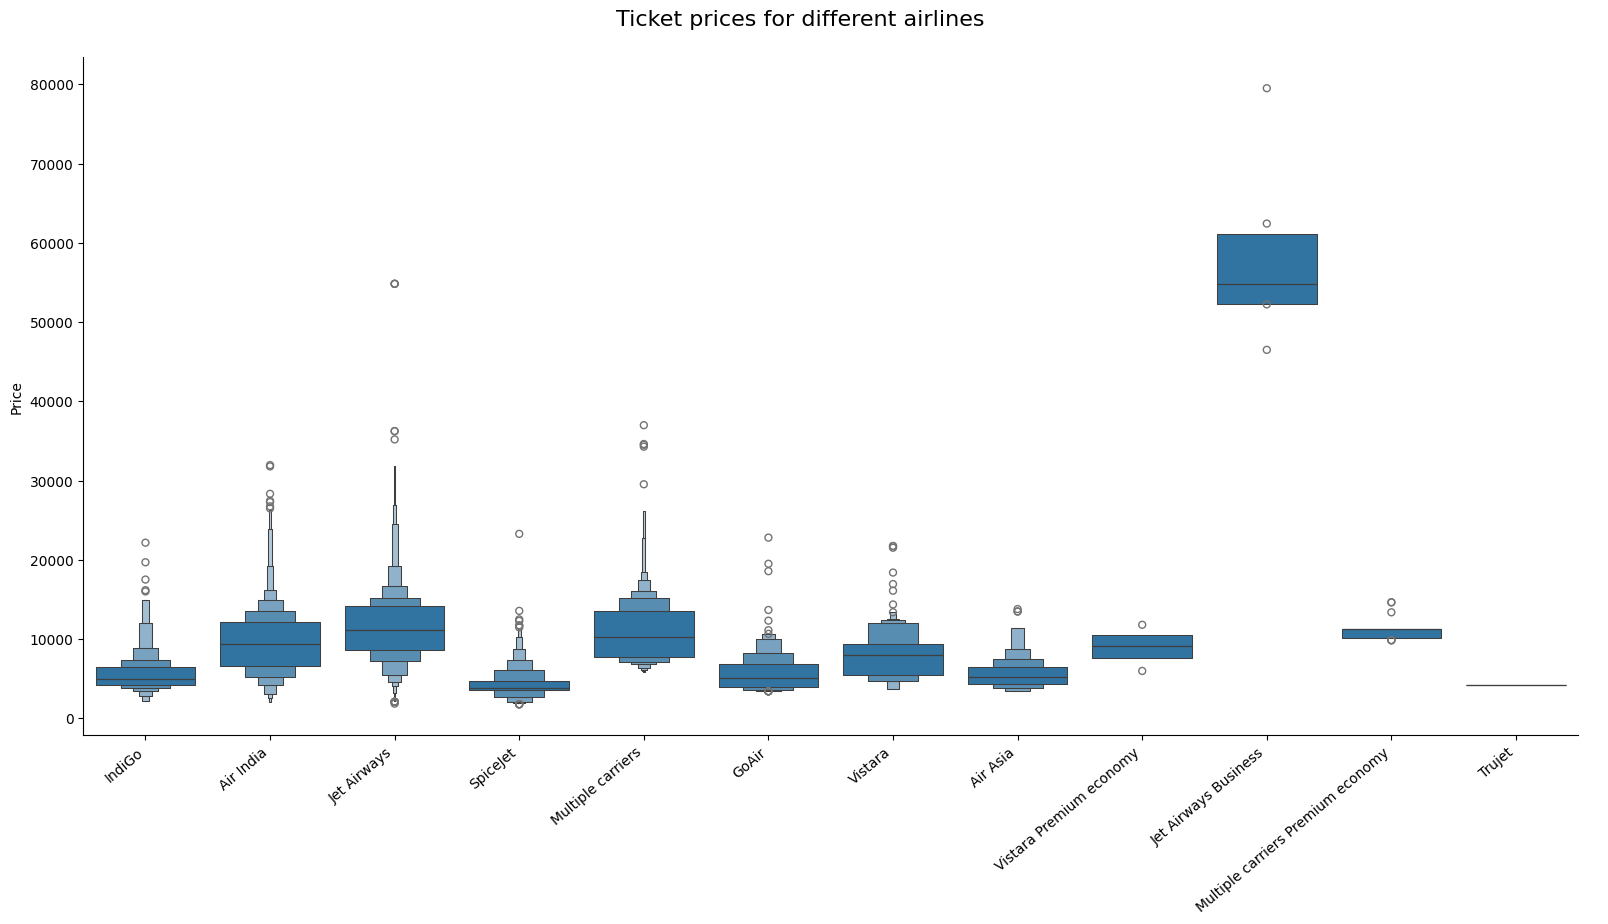

In [222]:
# Catplot to see prices according to airline 
catplot_1 = sns.catplot(data=data_1, x='Airline', y='Price', kind='boxen', height=8, aspect=2)
catplot_1.figure.suptitle('Ticket prices for different airlines', fontsize=16)
catplot_1.figure.subplots_adjust(top=0.92)
catplot_1.set_xticklabels(rotation=40, ha='right')
catplot_1.set_axis_labels('', 'Price')
plt.savefig('images/Prices_by_airlines.png', bbox_inches='tight')
plt.show()

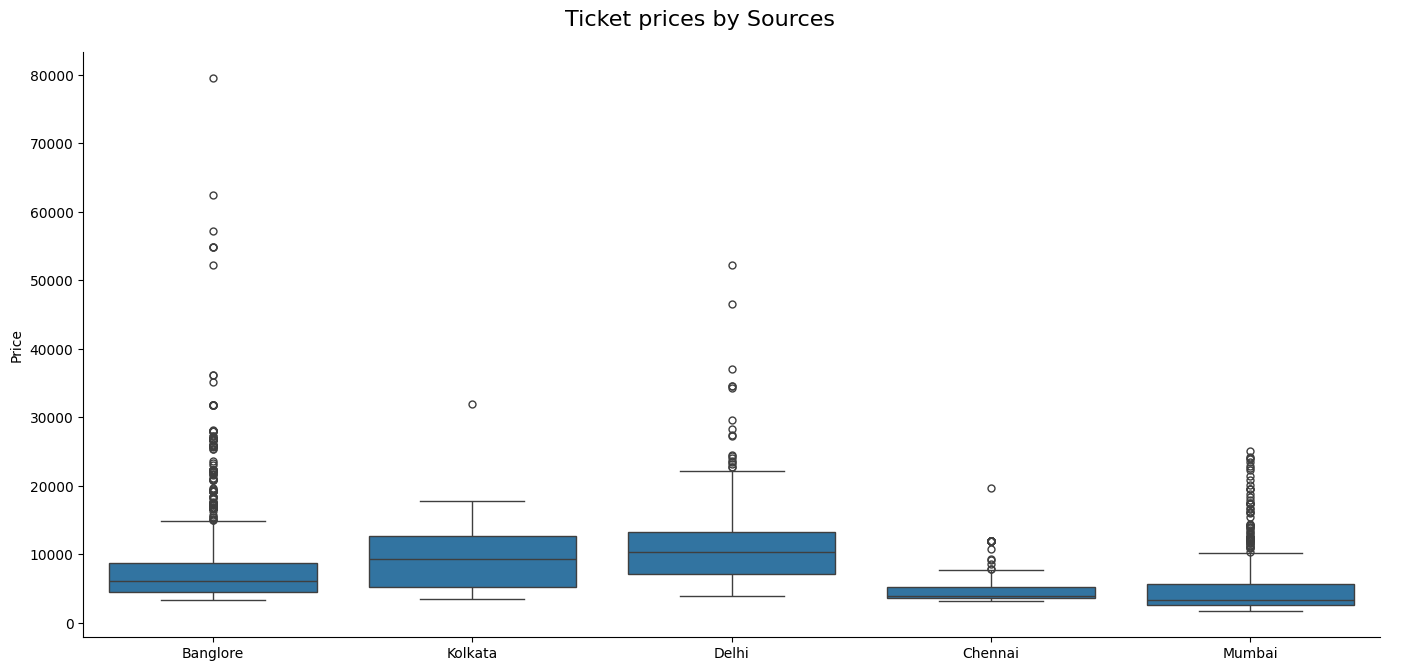

In [219]:
# Catplot to compare prices according to the source of the flight
catplot_2 = sns.catplot(data=data_1, x='Source', y='Price', kind='box', height=7, aspect=2)
catplot_2.figure.suptitle('Ticket prices by Sources', fontsize=16)
catplot_2.figure.subplots_adjust(top=0.92)
catplot_2.set_axis_labels('', 'Price')
plt.savefig('images/Prices_by_sources.png')
plt.show()

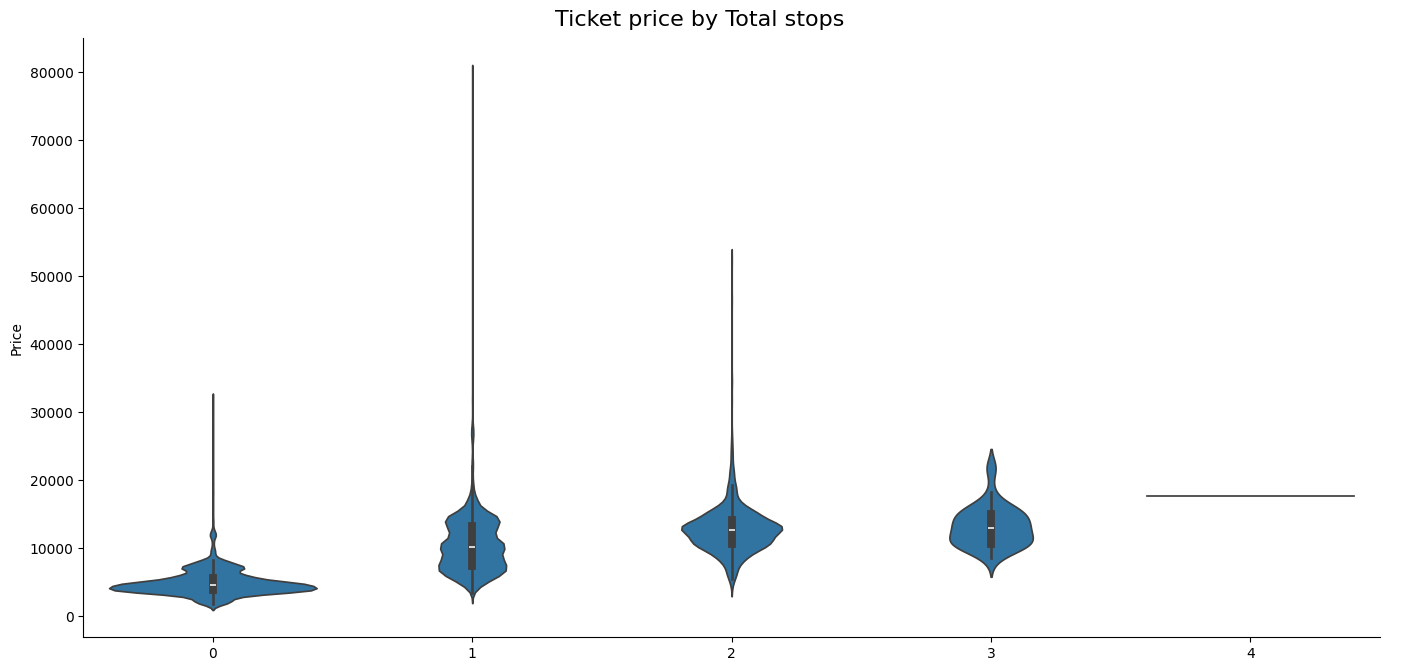

In [223]:
# Catplot for comparing prices from different type of stops
catplot_3 = sns.catplot(data=data_1, x='Total_Stops', y='Price', kind='violin', height=7, aspect=2)
catplot_3.figure.suptitle('Ticket price by Total stops', fontsize=16)
catplot_3.figure.subplots_adjust(top=0.94)
catplot_3.set_axis_labels('', 'Price')
plt.savefig('images/Prices_by_total_stops.png')
plt.show()

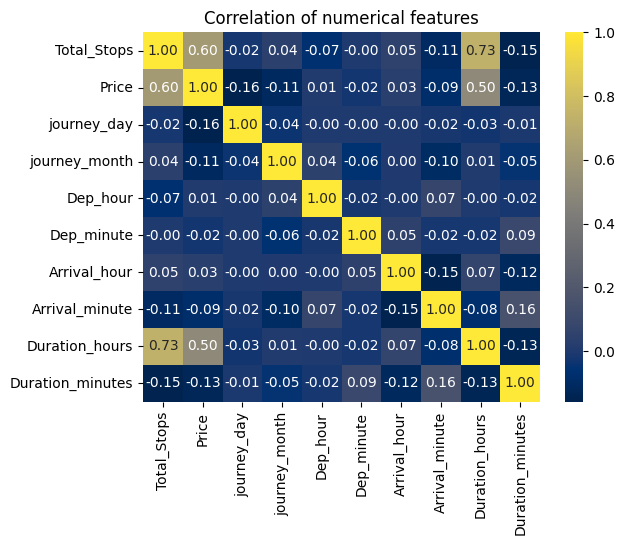

In [224]:
# Correaltion Matrix for numerical features
num_features = data_1.select_dtypes(include=['int', 'float']).columns.tolist()

corr_matrix = data_1[num_features].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='cividis', fmt='.2f')
plt.title('Correlation of numerical features')
plt.savefig('images/Correlation_matrix.png', bbox_inches='tight')
plt.show()

In [27]:
corr_matrix

,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
Price,1.000000,-0.159044,-0.113396,0.005155,-0.024155,0.031023,-0.086163,0.504200,-0.131664
journey_day,-0.159044,1.000000,-0.038331,-0.003394,-0.004741,-0.002448,-0.015086,-0.029382,-0.009244
journey_month,-0.113396,-0.038331,1.000000,0.040406,-0.062636,0.001423,-0.099261,0.006410,-0.046325
Dep_hour,0.005155,-0.003394,0.040406,1.000000,-0.015068,-0.003827,0.072989,-0.000648,-0.018843
Dep_minute,-0.024155,-0.004741,-0.062636,-0.015068,1.000000,0.046564,-0.021353,-0.022147,0.089269
Arrival_hour,0.031023,-0.002448,0.001423,-0.003827,0.046564,1.000000,-0.152036,0.065586,-0.116687
Arrival_minute,-0.086163,-0.015086,-0.099261,0.072989,-0.021353,-0.152036,1.000000,-0.075942,0.156176
Duration_hours,0.504200,-0.029382,0.006410,-0.000648,-0.022147,0.065586,-0.075942,1.000000,-0.133999
Duration_minutes,-0.131664,-0.009244,-0.046325,-0.018843,0.089269,-0.116687,0.156176,-0.133999,1.000000


In [28]:
data_1['Total_Stops'].value_counts()

Total_Stops
1 stop      5625
non-stop    3475
2 stops     1318
3 stops       43
4 stops        1
Name: count, dtype: int64

In [29]:
data_1['Airline'].value_counts()

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [30]:
data_1['Source'].value_counts()

Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [31]:
data_1['Destination'].value_counts()

Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [32]:
# Encoding the data

# Encoding the column 'Total_Stops'
data_1['Total_Stops'] = data_1['Total_Stops'].map({'non-stop': 0, '1 stop': 1, '2 stops': 2, '3 stops': 3, '4 stops': 4})

# Encoding the other categorical columns
cat_columns = data_1.select_dtypes(include='object').columns.tolist()
rest_columns = data_1.drop(cat_columns, axis=1).columns.tolist()
ohe = OneHotEncoder(drop='first', sparse_output=False, dtype='int', handle_unknown='ignore')
data_1_encoded = pd.DataFrame(ohe.fit_transform(data_1[cat_columns]), index=data_1.index, columns=ohe.get_feature_names_out())
data_final = pd.concat([data_1_encoded, data_1[rest_columns]], axis=1)

# Data Sample
data_final.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Total_Stops,Price,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,...,0,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,2,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,2,13882,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,1,6218,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,13302,1,3,16,50,21,35,4,45


# Train test and Dependency split

In [33]:
# Dependency split
X = data_final.drop('Price', axis=1)
Y = data_final['Price']

# Dimensions of the data
print(X.shape)
print(Y.shape)

(10462, 29)
(10462,)


In [34]:
# Data Sample
X.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,0,0,1,0,0,0,0,0,0,0,...,1,0,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,...,0,2,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,...,0,2,9,6,9,25,4,25,19,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,12,5,18,5,23,30,5,25
4,0,0,1,0,0,0,0,0,0,0,...,1,1,1,3,16,50,21,35,4,45


In [35]:
# Data Sample 'Y'
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

In [36]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Dimensions of the data
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(8369, 29)
(8369,)
(2093, 29)
(2093,)


In [37]:
# Data samples
x_train.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3154,0,0,0,1,0,0,0,0,0,0,...,0,1,1,4,18,55,9,20,14,25
4810,1,0,0,0,0,0,0,0,0,0,...,0,2,6,6,10,0,5,25,19,25
9046,0,0,0,0,0,0,0,0,0,0,...,0,2,24,5,15,10,23,30,8,20
7550,0,0,0,0,0,1,0,0,0,0,...,0,1,15,5,6,0,19,15,13,15
266,0,0,1,0,0,0,0,0,0,0,...,0,1,24,6,11,25,1,30,14,5


In [38]:
y_train.head()

3154     7064
4810    13007
9046     5192
7550     8266
266      5684
Name: Price, dtype: int64

In [39]:
x_test.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3017,0,0,0,0,0,0,0,1,0,0,...,0,0,27,3,6,55,9,35,2,40
9830,0,0,1,0,0,0,0,0,0,0,...,0,1,15,4,7,35,16,10,8,35
1506,0,0,0,0,0,0,0,1,0,0,...,0,0,1,4,22,20,0,40,2,20
4587,0,0,1,0,0,0,0,0,0,0,...,0,0,3,3,14,30,17,35,3,5
8189,0,0,0,1,0,0,0,0,0,0,...,1,1,12,3,7,0,23,0,16,0


In [40]:
y_test.head()

3017     3815
9830     6442
1506     3873
4587     7673
8189    13817
Name: Price, dtype: int64

In [41]:
# Scaling the training columns
scaler_train = StandardScaler()

# Implementing StandardScaler
x_train_scaled = pd.DataFrame(scaler_train.fit_transform(x_train), index=x_train.index, columns=scaler_train.get_feature_names_out())

# Data Sample
x_train_scaled.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3154,-0.444357,-0.136463,-0.491621,1.360322,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,0.292750,-1.473304,-0.599144,0.966414,1.633190,-0.635450,-0.284844,0.471312,-0.186959
4810,2.250443,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,1.798602,-0.885098,1.119826,-0.428205,-1.298464,-1.218525,0.015013,1.065850,-0.186959
9046,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,1.798602,1.232441,0.260341,0.443432,-0.765436,1.405312,0.314869,-0.242135,-0.483802
7550,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,2.778076,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,0.292750,0.173671,0.260341,-1.125515,-1.298464,0.822237,-0.584700,0.352404,-0.780645
266,-0.444357,-0.136463,2.034086,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,0.292750,1.232441,1.119826,-0.253878,0.034106,-1.801600,0.314869,0.471312,-1.374332


In [42]:
# Scaling the test data
# scaler_test = StandardScaler()

# Implemented StandardScaler
x_test_scaled = pd.DataFrame(scaler_train.transform(x_test), index=x_test.index, columns=scaler_train.get_feature_names_out())

# Data Sample
x_test_scaled.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Destination_New Delhi,Total_Stops,journey_day,journey_month,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
3017,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,3.400892,0.0,-0.215679,...,-0.309363,-1.213103,1.585365,-1.458629,-1.125515,1.633190,-0.635450,0.614725,-0.955581,0.703571
9830,-0.444357,-0.136463,2.034086,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,0.292750,0.173671,-0.599144,-0.951187,0.567134,0.384931,-0.884556,-0.242135,0.406727
1506,-0.444357,-0.136463,-0.491621,-0.735120,-0.026785,-0.359961,-0.034588,3.400892,0.0,-0.215679,...,-0.309363,-1.213103,-1.473304,-0.599144,1.663724,-0.232408,-1.947369,0.914581,-0.955581,-0.483802
4587,-0.444357,-0.136463,2.034086,-0.735120,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,-0.309363,-1.213103,-1.238022,-1.458629,0.269104,0.300620,0.530700,0.614725,-0.836673,-1.374332
8189,-0.444357,-0.136463,-0.491621,1.360322,-0.026785,-0.359961,-0.034588,-0.294041,0.0,-0.215679,...,3.232445,0.292750,-0.179252,-1.458629,-0.951187,-1.298464,1.405312,-1.484269,0.709127,-1.671175


In [112]:
x_train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8369 entries, 3154 to 6065
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline_Air India                          8369 non-null   float64
 1   Airline_GoAir                              8369 non-null   float64
 2   Airline_IndiGo                             8369 non-null   float64
 3   Airline_Jet Airways                        8369 non-null   float64
 4   Airline_Jet Airways Business               8369 non-null   float64
 5   Airline_Multiple carriers                  8369 non-null   float64
 6   Airline_Multiple carriers Premium economy  8369 non-null   float64
 7   Airline_SpiceJet                           8369 non-null   float64
 8   Airline_Trujet                             8369 non-null   float64
 9   Airline_Vistara                            8369 non-null   float64
 10  Airline_Vistara Premium ec

In [43]:
x_train_scaled.shape

(8369, 29)

In [44]:
x_test_scaled.shape

(2093, 29)

# Model Building

In [45]:
kfold = KFold(n_splits=10, shuffle=True, random_state=18)
#kfold = KFold()
#kfold = KFold(shuffle=True, random_state=18)

## Linear Regresion

In [46]:
# Model Building
lr_model = LinearRegression(positive=True, n_jobs=-1)

# Fitting the data
lr_model.fit(x_train_scaled, y_train)

LinearRegression(n_jobs=-1, positive=True)

In [47]:
# Prediction
y_pred_lr = lr_model.predict(x_test_scaled)

# Model score
print('-'*5, 'Linear Regression', '-'*5)
print('Training score:  ', round(lr_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Testing score:  ', round(lr_model.score(x_test_scaled, y_test)*100, 2), '%')

----- Linear Regression -----
Training score:   60.06 %
Testing score:   58.45 %


In [48]:
# Using GridSearchCV

# Creating the parameters for the GridSearchCV
lr_params = {'positive': [True],
             'fit_intercept': [True, False],
             'copy_X': [True, False],
            }

# Creating the GridSearchCV object
grid_search_lr = GridSearchCV(estimator=lr_model,
                             param_grid=lr_params,
                             scoring='r2',
                             cv=kfold,
                             verbose=1,
                             return_train_score=True,
                             n_jobs=-1 
                            )

# Fitting the data
grid_search_lr.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=18, shuffle=True),
             estimator=LinearRegression(n_jobs=-1, positive=True), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'positive': [True]},
             return_train_score=True, scoring='r2', verbose=1)

In [49]:
# Best parameters
grid_search_lr.best_params_

{'copy_X': True, 'fit_intercept': True, 'positive': True}

In [50]:
# Storing the best model
best_model_lr = grid_search_lr.best_estimator_

# Fitting the data
best_model_lr.fit(x_train_scaled, y_train)

# Prediction
y_pred_lr_final = best_model_lr.predict(x_test_scaled)

In [51]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> Linear Regression scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_lr))
print('MAE:', mean_absolute_error(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))
print('RMSE:', root_mean_squared_error(y_test, y_pred_lr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lr))

# After hyperparameter tuning
print('\n-----> Linear Regression (with GridSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_lr_final))
print('MAE:', mean_absolute_error(y_test, y_pred_lr_final))
print('MSE:', mean_squared_error(y_test, y_pred_lr_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_lr_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lr_final))

-----> Linear Regression scores <-----
R2_Score: 0.5845484443326399
MAE: 1947.7922609976567
MSE: 7614505.980143867
RMSE: 2759.4394322296453
MAPE: 0.23627960769288228

-----> Linear Regression (with GridSearchCV) scores <-----
R2_Score: 0.5845484443326399
MAE: 1947.7922609976567
MSE: 7614505.980143867
RMSE: 2759.4394322296453
MAPE: 0.23627960769288228


## Lasso Regressor

In [52]:
# Model Building 
lasso_model = Lasso()

# Fitting the data
lasso_model.fit(x_train_scaled, y_train)

Lasso()

In [53]:
# Prediction
y_pred_lasso = lasso_model.predict(x_test_scaled)

# Model score
print('-'*5, 'Lasso Regressor', '-'*5)
print('Training score:  ', round(lasso_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Testing score:  ', round(lasso_model.score(x_test_scaled, y_test)*100, 2), '%')

----- Lasso Regressor -----
Training score:   62.54 %
Testing score:   61.02 %


In [54]:
# Using GridSearchCV

# Creating the parameters for the GridSearchCV
lasso_params = {'copy_X': [True, False],
                'alpha': [0.137, 0.138, 0.139, 0.140, 0.141],
                'tol': [0.001, 0.0001, 0.00001, 0.000001],
                'precompute': [True, False],
                'selection': ['random', 'cyclic'],
                'max_iter': [600, 700, 800, 900, 1000]
               }

# Creating the GridSearchCV object
grid_search_lasso = GridSearchCV(estimator=lasso_model,
                             param_grid=lasso_params,
                             scoring='r2',
                             cv=kfold,
                             verbose=1,
                             return_train_score=True,
                             n_jobs=-1
                            )

# Fitting the data
grid_search_lasso.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=18, shuffle=True),
             estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.137, 0.138, 0.139, 0.14, 0.141],
                         'copy_X': [True, False],
                         'max_iter': [600, 700, 800, 900, 1000],
                         'precompute': [True, False],
                         'selection': ['random', 'cyclic'],
                         'tol': [0.001, 0.0001, 1e-05, 1e-06]},
             return_train_score=True, scoring='r2', verbose=1)

In [55]:
# Best parameters
grid_search_lasso.best_params_

{'alpha': 0.14,
 'copy_X': False,
 'max_iter': 700,
 'precompute': False,
 'selection': 'random',
 'tol': 1e-06}

In [56]:
# Best score
grid_search_lasso.best_score_

0.6198693463893201

In [57]:
# Storing the best model
best_model_lasso = grid_search_lasso.best_estimator_

# Fitting the data
best_model_lasso.fit(x_train_scaled, y_train)

# Prediction
y_pred_lasso_final = best_model_lasso.predict(x_test_scaled)

In [58]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> Lasso Regressor scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_lasso))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso))
print('MSE:', mean_squared_error(y_test, y_pred_lasso))
print('RMSE:', root_mean_squared_error(y_test, y_pred_lasso))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lasso))

# After hyperparameter tuning
print('\n-----> Lasso Regressor (with GridSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_lasso_final))
print('MAE:', mean_absolute_error(y_test, y_pred_lasso_final))
print('MSE:', mean_squared_error(y_test, y_pred_lasso_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_lasso_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lasso_final))

-----> Lasso Regressor scores <-----
R2_Score: 0.6102454350560231
MAE: 1932.1123124672022
MSE: 7143524.73849082
RMSE: 2672.7373119127924
MAPE: 0.24181367581526883

-----> Lasso Regressor (with GridSearchCV) scores <-----
R2_Score: 0.6101494389717201
MAE: 1932.475272654208
MSE: 7145284.180110485
RMSE: 2673.0664376536706
MAPE: 0.24190927513863245


## Decision Tree Regressor

In [59]:
# Model Building
dt_model = DecisionTreeRegressor(random_state=35)

# Fitting the data
dt_model.fit(x_train_scaled, y_train)

DecisionTreeRegressor(random_state=35)

In [60]:
# Prediction
y_pred_dt = dt_model.predict(x_test_scaled)

# Model score
print('-'*5, 'Decision Tree Regressor', '-'*5)
print('Training score:  ', round(dt_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Testing score:  ', round(dt_model.score(x_test_scaled, y_test)*100, 2), '%')

----- Decision Tree Regressor -----
Training score:   97.28 %
Testing score:   64.77 %


In [61]:
# Using RandomizedSearchCV

# Creating parameters for RandomizedSearchCV
dt_params = {#'criterion': ['absolute_error', 'friedman_mse', 'poisson', 'squared_error'],
             'max_depth': [15 ,20, 25, 30, 35, None],
             'min_samples_split': list(range(30, 41)),
             'min_samples_leaf': [1, 2, 3, 3, 5],
             'max_features': [0.75, 0.8, 0.85, 'sqrt', 'log', None],
             'max_leaf_nodes': [200, 210, 220, 230, 240],
             'splitter': ['best', 'random']
            }

# Creating RandomizedSearchCV object
tuned_dt = RandomizedSearchCV(estimator=DecisionTreeRegressor(random_state=35),
                                          param_distributions=dt_params,
                                          scoring='r2',
                                          cv=kfold,
                                          n_iter=100,
                                          n_jobs=-1,
                                          verbose=1,
                                          return_train_score=True,
                                          random_state=41
                                         )

# Fitting the data
tuned_dt.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=18, shuffle=True),
                   estimator=DecisionTreeRegressor(random_state=35), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [15, 20, 25, 30, 35, None],
                                        'max_features': [0.75, 0.8, 0.85,
                                                         'sqrt', 'log', None],
                                        'max_leaf_nodes': [200, 210, 220, 230,
                                                           240],
                                        'min_samples_leaf': [1, 2, 3, 3, 5],
                                        'min_samples_split': [30, 31, 32, 33,
                                                              34, 35, 36, 37,
                                                              38, 39, 40],
                                        'splitter': ['best', 'random']},
                   random_state=41, return_train_score=True, scoring='r2',
                   verbose=1)

In [62]:
# Best parameters
tuned_dt.best_params_

{'splitter': 'best',
 'min_samples_split': 32,
 'min_samples_leaf': 3,
 'max_leaf_nodes': 230,
 'max_features': 0.75,
 'max_depth': 25}

In [63]:
# Best score
tuned_dt.best_score_

0.804071425350867

In [64]:
# Storing the best model
best_model_dt = tuned_dt.best_estimator_

# Fitting the data
best_model_dt.fit(x_train_scaled, y_train)

# Prediction
y_pred_dt_final = best_model_dt.predict(x_test_scaled) 

In [65]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> Decision Tree Regressor scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_dt))
print('MAE:', mean_absolute_error(y_test, y_pred_dt))
print('MSE:', mean_squared_error(y_test, y_pred_dt))
print('RMSE:', root_mean_squared_error(y_test, y_pred_dt))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_dt))

# After hyperparameter tuning
print('\n-----> Decision Tree Regressor (with RandomizedSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_dt_final))
print('MAE:', mean_absolute_error(y_test, y_pred_dt_final))
print('MSE:', mean_squared_error(y_test, y_pred_dt_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_dt_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_dt_final))

-----> Decision Tree Regressor scores <-----
R2_Score: 0.6477082724045589
MAE: 1433.011243828635
MSE: 6456895.948365452
RMSE: 2541.042295666377
MAPE: 0.1604753060462652

-----> Decision Tree Regressor (with RandomizedSearchCV) scores <-----
R2_Score: 0.802384644178066
MAE: 1267.5597466113145
MSE: 3621946.5016979706
RMSE: 1903.1412195888067
MAPE: 0.14915105505825377


## Extra Trees Regressor

In [66]:
# Model Building
et_model = ExtraTreesRegressor(random_state=24, n_jobs=-1)
 
# Fitting the data
et_model.fit(x_train_scaled, y_train)

ExtraTreesRegressor(n_jobs=-1, random_state=24)

In [67]:
# Prediction
y_pred_et = et_model.predict(x_test_scaled)

# Model score
print('-'*5, 'Extra Trees Regressor', '-'*5)
print('Training score:  ', round(et_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Testing score:  ', round(et_model.score(x_test_scaled, y_test)*100, 2), '%')

----- Extra Trees Regressor -----
Training score:   97.28 %
Testing score:   76.87 %


In [68]:
# Using RandomizedSearchCV

# Creating parameters for RandomizedSearchCV
et_params = {
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'n_estimators': [280, 290, 300, 310, 320],
             'max_depth': [5, 10, 15, 20, 25, None],
             'max_features': [0.95, 0.96, 0.97, 'sqrt', 'log2', None]
            }

# Creating RandomizedSearchCV object
tuned_et = RandomizedSearchCV(estimator=ExtraTreesRegressor(random_state=24, n_jobs=-1),
                                          param_distributions=et_params,
                                          scoring='r2',
                                          cv=kfold,
                                          n_iter=100,
                                          n_jobs=-1,
                                          verbose=1,
                                          return_train_score=True,
                                          random_state=43
                                         )

# Fitting the data
tuned_et.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=18, shuffle=True),
                   estimator=ExtraTreesRegressor(n_jobs=-1, random_state=24),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, None],
                                        'max_features': [0.95, 0.96, 0.97,
                                                         'sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'n_estimators': [280, 290, 300, 310,
                                                         320]},
                   random_state=43, return_train_score=True, scoring='r2',
                   verbose=1)

In [69]:
# Best parameters
tuned_et.best_params_

{'n_estimators': 290,
 'min_samples_leaf': 2,
 'max_features': 0.96,
 'max_depth': 15}

In [70]:
# Tuning Score
tuned_et.best_score_

0.8415133476703188

In [71]:
# Storing the best model
best_model_et = tuned_et.best_estimator_

# Fitting the data
best_model_et.fit(x_train_scaled, y_train)

# Prediction
y_pred_et_final = best_model_et.predict(x_test_scaled)

In [72]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> Extra Trees Regressor scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_et))
print('MAE:', mean_absolute_error(y_test, y_pred_et))
print('MSE:', mean_squared_error(y_test, y_pred_et))
print('RMSE:', root_mean_squared_error(y_test, y_pred_et))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_et))

# After hyperparameter tuning
print('\n-----> Extra Trees Regressor (with RandomizedSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_et_final))
print('MAE:', mean_absolute_error(y_test, y_pred_et_final))
print('MSE:', mean_squared_error(y_test, y_pred_et_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_et_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_et_final))

-----> Extra Trees Regressor scores <-----
R2_Score: 0.7686963978445316
MAE: 1255.7931257365824
MSE: 4239393.58949428
RMSE: 2058.9787734443207
MAPE: 0.14027082341129246

-----> Extra Trees Regressor (with RandomizedSearchCV) scores <-----
R2_Score: 0.8418088240009568
MAE: 1133.2964781971202
MSE: 2899369.7080175374
RMSE: 1702.7535664380614
MAPE: 0.12959111002035203


## Random Forest Regressor

In [73]:
# Model Building
rf_model = RandomForestRegressor(random_state=27, n_jobs=-1)
# Fitting the data
rf_model.fit(x_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1, random_state=27)

In [74]:
# Prediction
y_pred_rf = rf_model.predict(x_test_scaled)

# Model Score
print('-'*5, 'Random Forest Regressor', '-'*5)
print('Training score:  ', round(rf_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Testing score:  ', round(rf_model.score(x_test_scaled, y_test)*100, 2), '%')

----- Random Forest Regressor -----
Training score:   95.46 %
Testing score:   79.94 %


In [75]:
# Hyperparameter Tuning

# Creating parameters for RandomizedSearchCV
rf_params = {
             'n_estimators': [100, 200, 300, 400, 500, 600, 700],
             'min_samples_split': [7, 8, 9, 10, 11],
             'min_samples_leaf': [1, 2, 3, 4, 5],
             'max_features': [0.6, 0.7, 0.8, 'sqrt', 'log2', None],
             'max_depth': [35, 40, 45, 50, 55, None]
            }

# Creating RandomizedSearchCV object
tuned_rf = RandomizedSearchCV(estimator=rf_model,
                                          param_distributions=rf_params,
                                          scoring='r2',
                                          cv=kfold,
                                          n_iter=100,
                                          n_jobs=-1,
                                          verbose=1,
                                          return_train_score=True,
                                          random_state=45
                                         )
# Fitting the data
tuned_rf.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=18, shuffle=True),
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=27),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50, 55, None],
                                        'max_features': [0.6, 0.7, 0.8, 'sqrt',
                                                         'log2', None],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [7, 8, 9, 10, 11],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700]},
                   random_state=45, return_train_score=True, scoring='r2',
                   verbose=1)

In [76]:
# Best parameters
tuned_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_features': 0.6,
 'max_depth': 40}

In [77]:
# Best score
tuned_rf.best_score_

0.8340335690233301

In [78]:
# Storing the best model
best_model_rf = tuned_rf.best_estimator_

# Fitting the data
best_model_rf.fit(x_train_scaled, y_train)

# Prediction
y_pred_rf_final = best_model_rf.predict(x_test_scaled)

In [79]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> Random Forest Regressor scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_rf))
print('MAE:', mean_absolute_error(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))
print('RMSE:', root_mean_squared_error(y_test, y_pred_rf))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_rf))

# After hyperparameter tuning
print('\n-----> Random Forest Regressor (with RandomizedSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_rf_final))
print('MAE:', mean_absolute_error(y_test, y_pred_rf_final))
print('MSE:', mean_squared_error(y_test, y_pred_rf_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_rf_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_rf_final))

-----> Random Forest Regressor scores <-----
R2_Score: 0.7994235332164779
MAE: 1214.5407057326731
MSE: 3676218.526479929
RMSE: 1917.3467413276946
MAPE: 0.13751155003650223

-----> Random Forest Regressor (with RandomizedSearchCV) scores <-----
R2_Score: 0.8344570762681155
MAE: 1148.7442941433078
MSE: 3034114.484664976
RMSE: 1741.8709724503065
MAPE: 0.13185817152532067


## Ada Boost Regressor

In [80]:
# Model Building
ada_model = AdaBoostRegressor(random_state=27)

# Fitting the data
ada_model.fit(x_train_scaled, y_train)

AdaBoostRegressor(random_state=27)

In [81]:
# Prediction
y_pred_ada = ada_model.predict(x_test_scaled)

# Model Score
print('-'*5, 'Ada Boost Regressor', '-'*5)
print('Train score:  ', round(ada_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Test score:  ', round(ada_model.score(x_test_scaled, y_test)*100, 2), '%')

----- Ada Boost Regressor -----
Train score:   42.89 %
Test score:   27.32 %


In [82]:
# Setting up the cross validation for the model
ada_kfold = KFold()
ada_kfold1 = KFold(shuffle=True, random_state=18)
ada_kfold2 = KFold(n_splits=10, shuffle=True, random_state=18)

In [83]:
# Hyperparameter Tuning

# Defining parameters for RandomizedSearchCV
ada_params = {
    'estimator__max_depth': [11, 13, 15, 17, 19],
    'learning_rate': [0.175, 0.2, 0.225, 0.25, 0.275],
    'loss': ['linear', 'square', 'exponential'],
    'n_estimators': [150, 160, 170, 180, 190]
}

# Creating a RandomizedSearchCV object
tuned_ada = RandomizedSearchCV(estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=35), random_state=27),
                               param_distributions=ada_params,
                               scoring='r2',
                               verbose=1,
                               cv=ada_kfold1,
                               n_iter=300,
                               n_jobs=-1,
                               return_train_score=True,
                               random_state=47
                               )

# Fitting the data
tuned_ada.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=18, shuffle=True),
                   estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(random_state=35),
                                               random_state=27),
                   n_iter=300, n_jobs=-1,
                   param_distributions={'estimator__max_depth': [11, 13, 15, 17,
                                                                 19],
                                        'learning_rate': [0.175, 0.2, 0.225,
                                                          0.25, 0.275],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [150, 160, 170, 180,
                                                         190]},
                   random_state=47, return_train_score=True, scoring='r2',
                   verbose=1)

In [84]:
# Best parameters
tuned_ada.best_params_

{'n_estimators': 170,
 'loss': 'exponential',
 'learning_rate': 0.225,
 'estimator__max_depth': 13}

In [85]:
# Best score
tuned_ada.best_score_

0.827039173945195

In [86]:
# Storing the best model
best_model_ada = tuned_ada.best_estimator_

# Fitting the data
best_model_ada.fit(x_train_scaled, y_train)

# Prediction
y_pred_ada_final = best_model_ada.predict(x_test_scaled)

In [87]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> Ada Boost Regressor scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_ada))
print('MAE:', mean_absolute_error(y_test, y_pred_ada))
print('MSE:', mean_squared_error(y_test, y_pred_ada))
print('RMSE:', root_mean_squared_error(y_test, y_pred_ada))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_ada))

# After hyperparameter tuning
print('\n-----> Ada Boost Regressor (with RandomizedSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_ada_final))
print('MAE:', mean_absolute_error(y_test, y_pred_ada_final))
print('MSE:', mean_squared_error(y_test, y_pred_ada_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_ada_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_ada_final))

-----> Ada Boost Regressor scores <-----
R2_Score: 0.27321896348622265
MAE: 3020.6595630685415
MSE: 13320635.037458593
RMSE: 3649.744516737931
MAPE: 0.491424670524048

-----> Ada Boost Regressor (with RandomizedSearchCV) scores <-----
R2_Score: 0.8455994281009466
MAE: 1147.607353386884
MSE: 2829894.513632082
RMSE: 1682.2290312653868
MAPE: 0.13096147175308892


## LightGBM Regresssor

In [88]:
# Builing a Model
lgbm_model = LGBMRegressor(random_state=26)

# Fitting the data
lgbm_model.fit(x_train_scaled, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 199
[LightGBM] [Info] Number of data points in the train set: 8369, number of used features: 25
[LightGBM] [Info] Start training from score 9049.087705


  File "c:\Users\Twarit\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Twarit\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Twarit\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Twarit\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


LGBMRegressor(random_state=26)

In [89]:
# Prediction 
y_pred_lgbm = lgbm_model.predict(x_test_scaled)

# Model Scores
print('-'*5, 'LightGBM Regressor', '-'*5)
print('Train score:  ', round(lgbm_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Test score:  ', round(lgbm_model.score(x_test_scaled, y_test)*100, 2), '%')

----- LightGBM Regressor -----
Train score:   87.25 %
Test score:   83.67 %


In [90]:
# Hyperparameter Tuning

# Defining parameters for RandomizedSearchCV
lgbm_params = {'n_estimators': [200, 250, 300, 350, 400],
               'learning_rate': [0.07, 0.08, 0.09],
               'num_leaves': [31, 63, 127],
               'max_depth': [55, 60, 65, 70, 75, -1],
               'min_child_samples': [2, 3, 4, 5, 6],
               'subsample': [0.6, 0.8, 1.0],
               'colsample_bytree': [0.6, 0.8, 1.0]
               }

# Creating the RandomizdSearchCV object
tuned_lgbm = RandomizedSearchCV(estimator=lgbm_model,
                                param_distributions=lgbm_params,
                                scoring='r2',
                                verbose=3,
                                cv=kfold,
                                n_iter=100,
                                n_jobs=-1,
                                return_train_score=True,
                                random_state=41
                                )

# Fitting the data
tuned_lgbm.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001111 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 8369, number of used features: 27
[LightGBM] [Info] Start training from score 9049.087705


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=18, shuffle=True),
                   estimator=LGBMRegressor(random_state=26), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.07, 0.08, 0.09],
                                        'max_depth': [55, 60, 65, 70, 75, -1],
                                        'min_child_samples': [2, 3, 4, 5, 6],
                                        'n_estimators': [200, 250, 300, 350,
                                                         400],
                                        'num_leaves': [31, 63, 127],
                                        'subsample': [0.6, 0.8, 1.0]},
                   random_state=41, return_train_score=True, scoring='r2',
                   verbose=3)

In [91]:
# Best parameters
tuned_lgbm.best_params_

{'subsample': 0.8,
 'num_leaves': 31,
 'n_estimators': 300,
 'min_child_samples': 4,
 'max_depth': 75,
 'learning_rate': 0.09,
 'colsample_bytree': 0.6}

In [92]:
# Best score
tuned_lgbm.best_score_

0.8491183376324549

In [93]:
# Storing the best model
best_model_lgbm = tuned_lgbm.best_estimator_

# Fitting the data
best_model_lgbm.fit(x_train_scaled, y_train)

# Prediction
y_pred_lgbm_final = best_model_lgbm.predict(x_test_scaled)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000833 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 205
[LightGBM] [Info] Number of data points in the train set: 8369, number of used features: 27
[LightGBM] [Info] Start training from score 9049.087705


In [94]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> LightGBM Regressor scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_lgbm))
print('MAE:', mean_absolute_error(y_test, y_pred_lgbm))
print('MSE:', mean_squared_error(y_test, y_pred_lgbm))
print('RMSE:', root_mean_squared_error(y_test, y_pred_lgbm))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lgbm))

# After hyperparameter tuning
print('\n-----> LightGBM Regressor (with RandomizedSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_lgbm_final))
print('MAE:', mean_absolute_error(y_test, y_pred_lgbm_final))
print('MSE:', mean_squared_error(y_test, y_pred_lgbm_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_lgbm_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_lgbm_final))

-----> LightGBM Regressor scores <-----
R2_Score: 0.8366931118267853
MAE: 1248.6198828923118
MSE: 2993131.8336168756
RMSE: 1730.0670026380121
MAPE: 0.14644711185432

-----> LightGBM Regressor (with RandomizedSearchCV) scores <-----
R2_Score: 0.8499023950029052
MAE: 1134.9504079330534
MSE: 2751028.5983156897
RMSE: 1658.6225002440096
MAPE: 0.13123740792666988


## K Neighbors Regressor 

In [95]:
# Building the model
knr_model = KNeighborsRegressor()

# Fitting the data
knr_model.fit(x_train_scaled, y_train)

KNeighborsRegressor()

In [96]:
# Prediction
y_pred_knr = knr_model.predict(x_test_scaled)

# Model scores
print('-'*5, 'K Neighbors Regressor', '-'*5)
print('Training score:  ', round(knr_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Testing score:  ', round(knr_model.score(x_test_scaled, y_test)*100, 2), '%')

----- K Neighbors Regressor -----
Training score:   83.95 %
Testing score:   76.1 %


In [97]:
# Hyperparameter Tuning

# Defining parameters for RandomizedSearchCV
knr_params = {'n_neighbors': list(range(1, 11)),
              'weights': ['uniform', 'distance'],
              'p': [1, 2],
              'metric': ['minkowski', 'euclidean', 'manhattan'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': list(range(20, 36))
              }

# Creating a RandomizedSearchCV object
tuned_knr = RandomizedSearchCV(estimator=knr_model,
                               param_distributions=knr_params,
                               scoring='r2',
                               verbose=3,
                               cv=kfold,
                               n_iter=300,
                               n_jobs=-1,
                               return_train_score=True,
                               random_state=49
                               )

# Fitting the data
tuned_knr.fit(x_train_scaled, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=18, shuffle=True),
                   estimator=KNeighborsRegressor(), n_iter=300, n_jobs=-1,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'leaf_size': [20, 21, 22, 23, 24, 25,
                                                      26, 27, 28, 29, 30, 31,
                                                      32, 33, 34, 35],
                                        'metric': ['minkowski', 'euclidean',
                                                   'manhattan'],
                                        'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                                        'p': [1, 2],
                                        'weights': ['uniform', 'distance']},
                   random_state=49, return_train_score=True, scoring='r2',
                   verbose=3)

In [98]:
# Best parameters
tuned_knr.best_params_

{'weights': 'uniform',
 'p': 2,
 'n_neighbors': 5,
 'metric': 'manhattan',
 'leaf_size': 28,
 'algorithm': 'brute'}

In [99]:
# Best Score
tuned_knr.best_score_

0.7496121995631848

In [100]:
# Storing the best model
best_model_knr = tuned_knr.best_estimator_

# Fitting the data
best_model_knr.fit(x_train_scaled, y_train)

# Prediction
y_pred_knr_final = best_model_knr.predict(x_test_scaled)

In [101]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> K Neighbors Regressor scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_knr))
print('MAE:', mean_absolute_error(y_test, y_pred_knr))
print('MSE:', mean_squared_error(y_test, y_pred_knr))
print('RMSE:', root_mean_squared_error(y_test, y_pred_knr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_knr))

# After hyperparameter tuning
print('\n-----> K Neighbors Regressor (with RandomizedSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_knr_final))
print('MAE:', mean_absolute_error(y_test, y_pred_knr_final))
print('MSE:', mean_squared_error(y_test, y_pred_knr_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_knr_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_knr_final))

-----> K Neighbors Regressor scores <-----
R2_Score: 0.7609959324063839
MAE: 1381.9045389393216
MSE: 4380529.756464406
RMSE: 2092.971513533905
MAPE: 0.15867981744753412

-----> K Neighbors Regressor (with RandomizedSearchCV) scores <-----
R2_Score: 0.733425246683441
MAE: 1395.1834687052078
MSE: 4885852.575575729
RMSE: 2210.396474747399
MAPE: 0.15988061489540206


## XGBoost Regressor

In [113]:
# Building the Model
xgb_model = XGBRegressor()

# Fitting the data
xgb_model.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [114]:
# Prediction
y_pred_xgb = xgb_model.predict(x_test_scaled)

# Model Scores
print('-'*5, 'XGBoost Regressor', '-'*5)
print('Training score:  ', round(xgb_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Testing score:  ', round(xgb_model.score(x_test_scaled, y_test)*100, 2), '%')

----- XGBoost Regressor -----
Training score:   93.86 %
Testing score:   83.22 %


In [115]:
# Hyperparameter Tuning 

# Defining parameters for RandomizedSearchCV
xgb_params = {
    'n_estimators': [200, 300, 400, 500, 750, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],   
    'max_depth': [3, 5, 7, 9, 11, 15],            
    'min_child_weight': [1, 3, 5, 7, 10],        
    'gamma': [0.0, 0.1, 0.2, 0.3, 0.4], 
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],        
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'reg_alpha': [0, 0.005, 0.01, 0.05, 0.1, 0.5],
    'reg_lambda': [0, 0.005, 0.01, 0.05, 0.1, 0.5]
}

# Creating a RandomizedSearchCV object
tuned_xgb = RandomizedSearchCV(estimator=xgb_model,
                               param_distributions=xgb_params,
                               scoring='r2',
                               n_iter=100,
                               cv=5,
                               n_jobs=-1,
                               verbose=3,
                               return_train_score=True,
                               random_state=53
                               )

# Fitting the data
tuned_xgb.fit(x_train_scaled, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.15,
                                                          0.2],
                                        'max_depth': [3, 5, 7, 9, 11, 15],
                                        'min_child_weight': [1, 3, 5, 7, 10],
                                        'n_estimators': [200, 300, 400, 500,
                                                         750, 1000],
                                        'reg_alpha': [0, 0.005, 0.01, 0.05, 0.1,
                                                      0.5],
                                        'reg_lambda': [0, 0.005, 0.01, 0.05,
                                                       0.1, 0.5],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=53, return_train_score=True, scoring='r2',
                   verbose=3)

In [116]:
# Best parameters
tuned_xgb.best_params_

{'subsample': 1.0,
 'reg_lambda': 0.5,
 'reg_alpha': 0,
 'n_estimators': 200,
 'min_child_weight': 3,
 'max_depth': 7,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [118]:
# Best score
tuned_xgb.best_score_

0.8347877186651941

In [120]:
# Storing the best model
best_model_xgb = tuned_xgb.best_estimator_

# Fitting the data
best_model_xgb.fit(x_train_scaled, y_train)

# Prediction
y_pred_xgb_final = best_model_xgb.predict(x_test_scaled)

In [121]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> Support Vector Regressor scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_xgb))
print('MAE:', mean_absolute_error(y_test, y_pred_xgb))
print('MSE:', mean_squared_error(y_test, y_pred_xgb))
print('RMSE:', root_mean_squared_error(y_test, y_pred_xgb))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_xgb))

# After hyperparameter tuning
print('\n-----> Support Vector Regressor (with RandomizedSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_xgb_final))
print('MAE:', mean_absolute_error(y_test, y_pred_xgb_final))
print('MSE:', mean_squared_error(y_test, y_pred_xgb_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_xgb_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_xgb_final))

-----> Support Vector Regressor scores <-----
R2_Score: 0.8321933349550015
MAE: 1177.4002280201116
MSE: 3075604.9341074303
RMSE: 1753.7402698539572
MAPE: 0.1359507445306806

-----> Support Vector Regressor (with RandomizedSearchCV) scores <-----
R2_Score: 0.8407408049696294
MAE: 1193.743367551903
MSE: 2918944.6432657316
RMSE: 1708.491920749329
MAPE: 0.1378103518697311


## Support Vector Regressor

In [102]:
# Building the Model
svr_model = SVR()

# Fitting the data
svr_model.fit(x_train_scaled, y_train)

SVR()

In [103]:
# Prediction
y_pred_svr = svr_model.predict(x_test_scaled)

# Model Scores
print('-'*5, 'Support Vector Regressor', '-'*5)
print('Training score:  ', round(svr_model.score(x_train_scaled, y_train)*100, 2), '%')
print('Testing score:  ', round(svr_model.score(x_test_scaled, y_test)*100, 2), '%')

----- Support Vector Regressor -----
Training score:   5.24 %
Testing score:   7.02 %


In [104]:
# Setting up Cross validator for the model
svr_kfold = KFold(n_splits=3, shuffle=True)

In [105]:
# Hyperparameter Tuning 

# Defining parameters for RandomizedSearchCV
svr_params = {'C': [80000, 100000, 120000],
              'epsilon': [0.4, 0.5, 0.6],
              'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10, 100]
              }

# Creating a RandomizedSearchCV object
tuned_svr = RandomizedSearchCV(estimator=SVR(kernel='rbf'),
                               param_distributions=svr_params,
                               scoring='r2',
                               n_iter=100,
                               cv=3,
                               n_jobs=-1,
                               verbose=1,
                               return_train_score=True,
                               random_state=41
                               )

# Fitting the data
tuned_svr.fit(x_train_scaled, y_train)

Fitting 3 folds for each of 63 candidates, totalling 189 fits


RandomizedSearchCV(cv=3, estimator=SVR(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': [80000, 100000, 120000],
                                        'epsilon': [0.4, 0.5, 0.6],
                                        'gamma': ['scale', 'auto', 0.01, 0.1, 1,
                                                  10, 100]},
                   random_state=41, return_train_score=True, scoring='r2',
                   verbose=1)

In [106]:
# Best parameters
tuned_svr.best_params_

{'gamma': 'scale', 'epsilon': 0.6, 'C': 120000}

In [107]:
# Best score
tuned_svr.best_score_

0.7716077993554252

In [108]:
# Storing the best model
best_model_svr = tuned_svr.best_estimator_

# Fitting the data
best_model_svr.fit(x_train_scaled, y_train)

# Prediction
y_pred_svr_final = best_model_svr.predict(x_test_scaled)

In [109]:
# Metrics for model performance

# Before hyperparameter tuning
print('-----> Support Vector Regressor scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_svr))
print('MAE:', mean_absolute_error(y_test, y_pred_svr))
print('MSE:', mean_squared_error(y_test, y_pred_svr))
print('RMSE:', root_mean_squared_error(y_test, y_pred_svr))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_svr))

# After hyperparameter tuning
print('\n-----> Support Vector Regressor (with RandomizedSearchCV) scores <-----')
print('R2_Score:', r2_score(y_test, y_pred_svr_final))
print('MAE:', mean_absolute_error(y_test, y_pred_svr_final))
print('MSE:', mean_squared_error(y_test, y_pred_svr_final))
print('RMSE:', root_mean_squared_error(y_test, y_pred_svr_final))
print('MAPE:', mean_absolute_percentage_error(y_test, y_pred_svr_final))

-----> Support Vector Regressor scores <-----
R2_Score: 0.07016204585344854
MAE: 3248.5440995156387
MSE: 17042315.92306904
RMSE: 4128.233995677697
MAPE: 0.44684935930519026

-----> Support Vector Regressor (with RandomizedSearchCV) scores <-----
R2_Score: 0.7805089583110687
MAE: 1274.5305081984193
MSE: 4022889.857383391
RMSE: 2005.7143010367631
MAPE: 0.14701166364880255


## Scores before and after Hyperparmater tuning

In [230]:
# Intializing testing scores

# Before CV
lr_score = lr_model.score(x_test_scaled, y_test)
lasso_score = lasso_model.score(x_test_scaled, y_test)
dt_score = dt_model.score(x_test_scaled, y_test)
et_score = et_model.score(x_test_scaled, y_test)
rf_score = rf_model.score(x_test_scaled, y_test)
ada_score = ada_model.score(x_test_scaled, y_test)
lgbm_score = lgbm_model.score(x_test_scaled, y_test)
knr_score = knr_model.score(x_test_scaled, y_test)
svr_score = r2_score(y_test, y_pred_svr)
xgb_score = xgb_model.score(x_test_scaled, y_test)

# After CV
lr_score_cv = best_model_lr.score(x_test_scaled, y_test)
lasso_score_cv = best_model_lasso.score(x_test_scaled, y_test)
dt_score_cv = best_model_dt.score(x_test_scaled, y_test)
et_score_cv = best_model_et.score(x_test_scaled, y_test)
rf_score_cv = best_model_rf.score(x_test_scaled, y_test)
ada_score_cv = best_model_ada.score(x_test_scaled, y_test)
lgbm_score_cv = best_model_lgbm.score(x_test_scaled, y_test)
knr_score_cv = best_model_knr.score(x_test_scaled, y_test)
svr_score_cv = r2_score(y_test, y_pred_svr_final)
xgb_score_cv = best_model_xgb.score(x_test_scaled, y_test)

# Storing them in a dictionary
dict_scores1 = {
    'Models': ['Linear Regression', 'Lasso Model', 'Decision Tree', 'Extra Trees Regressor', 'Random Forest', 'Ada Boost', 'LightGBM', 'K Neighbors', 'Support Vector Machine', 'XGBoost'],
    'Before CV': [lr_score, lasso_score, dt_score, et_score, rf_score, ada_score, lgbm_score, knr_score, svr_score, xgb_score],
    'After CV': [lr_score_cv, lasso_score_cv, dt_score_cv, et_score_cv, rf_score_cv, ada_score_cv, lgbm_score_cv, knr_score_cv, svr_score_cv, xgb_score_cv]
}

dict_scores2 = {
    'Models': ['Linear Regression', 'Lasso Model', 'Decision Tree', 'Extra Trees Regressor', 'Random Forest', 'Ada Boost', 'LightGBM', 'K Neighbors', 'Support Vector Machine', 'XGBoost'],
    'Before tuning': [round(lr_score*100, 2), 
                  round(lasso_score*100, 2), 
                  round(dt_score*100, 2), 
                  round(et_score*100, 2), 
                  round(rf_score*100, 2), 
                  round(ada_score*100, 2), 
                  round(lgbm_score*100, 2), 
                  round(knr_score*100, 2), 
                  round(svr_score*100, 2),
                  round(xgb_score*100, 2)
                  ],
    'After tuning': [round(lr_score_cv*100, 2), 
                 round(lasso_score_cv*100, 2), 
                 round(dt_score_cv*100, 2), 
                 round(et_score_cv*100, 2), 
                 round(rf_score_cv*100, 2), 
                 round(ada_score_cv*100, 2), 
                 round(lgbm_score_cv*100, 2), 
                 round(knr_score_cv*100, 2), 
                 round(svr_score_cv*100, 2),
                 round(xgb_score_cv*100, 2)]
}   

# Coverting them into a dataframe
scores1 = pd.DataFrame(dict_scores1)
scores2 = pd.DataFrame(dict_scores2)

# Displaying the scores
scores2

,Models,Before tuning,After tuning
0,Linear Regression,58.45,58.45
1,Lasso Model,61.02,61.01
2,Decision Tree,64.77,80.24
3,Extra Trees Regressor,76.87,84.18
4,Random Forest,79.94,83.45
5,Ada Boost,27.32,84.56
6,LightGBM,83.67,84.99
7,K Neighbors,76.10,73.34
8,Support Vector Machine,7.02,78.05
9,XGBoost,83.22,84.07


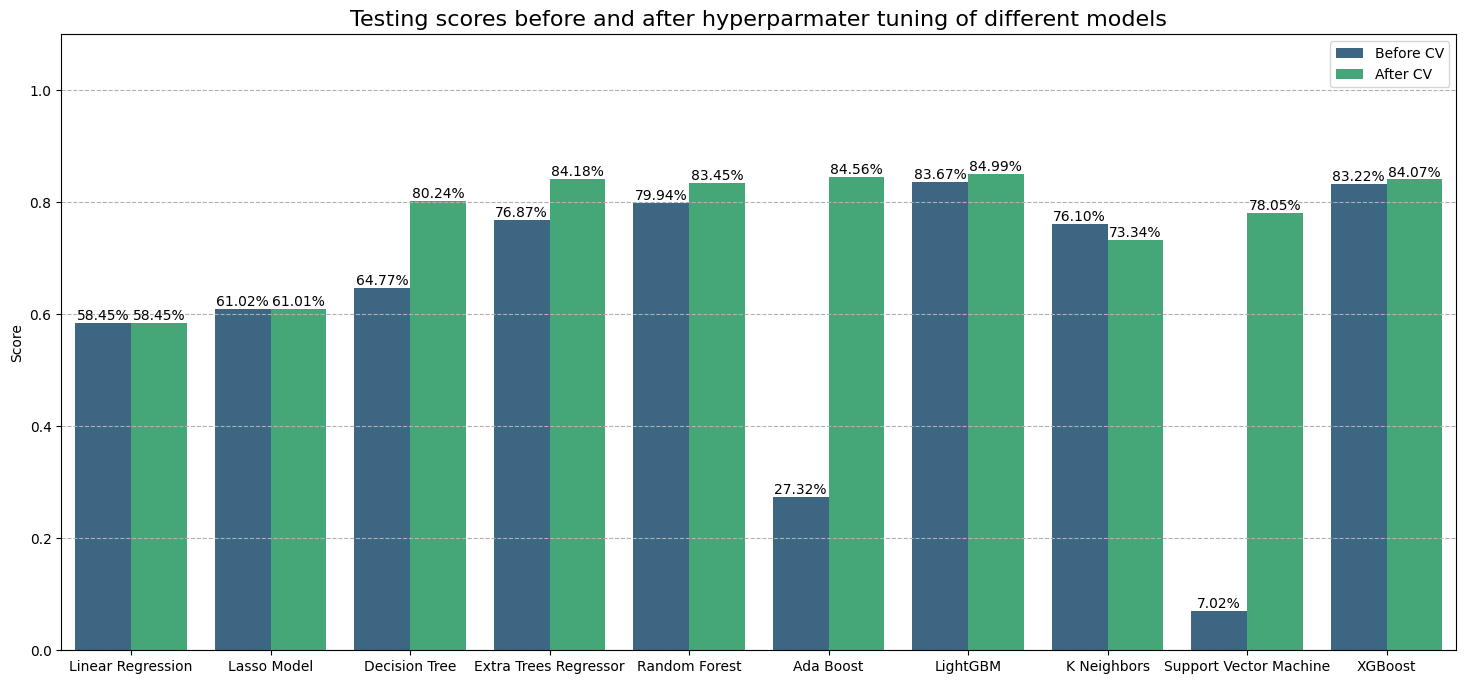

In [231]:
# Barplots for plotting all the scores

# Melting the 'scores' dataframe
melted_scores = scores1.melt('Models', var_name='Score Type', value_name='Score')

# Creating a barchat to display scores of different models
plt.figure(figsize=(18, 8))
sns.barplot(x='Models', y=melted_scores['Score'], hue='Score Type', data=melted_scores, palette='viridis')

# Adding labels and title
plt.title('Testing scores before and after hyperparmater tuning of different models', fontsize=16)
plt.xlabel('')
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--')

# Adding percentage scores above the bars
ax = plt.gca()
for p in ax.patches:
    if p.get_height() > 0:
        ax.text(
            p.get_x() + p.get_width() / 2.,
            p.get_height(),
            f'{p.get_height():.2%}',
            color='black',
            ha='center',
            va='bottom'
        )

# Plotting the legend and the barplot
plt.legend()
plt.savefig('images/Testing_cv_scores.png', bbox_inches='tight')
plt.show()

In [125]:
melted_scores

,Models,Score Type,Score
0,Linear Regression,Before CV,0.584548
1,Lasso Model,Before CV,0.610245
2,Decision Tree,Before CV,0.647708
3,Extra Trees Regressor,Before CV,0.768696
4,Random Forest,Before CV,0.799424
5,Ada Boost,Before CV,0.273219
6,LightGBM,Before CV,0.836693
7,K Neighbors,Before CV,0.760996
8,Support Vector Machine,Before CV,0.070162
9,XGBoost,Before CV,0.832193


## Saving the best model

In [232]:
import pickle

In [233]:
# Saving the model into a file
pickle_out1 = open("Deployment/models/flight_price_predictor_cv.pkl", mode="wb")
pickle_out2 = open("Deployment-Flask/models/flight_price_predictor_cv.pkl", mode="wb")
pickle.dump(best_model_lgbm, pickle_out1)
pickle.dump(best_model_lgbm, pickle_out2)
pickle_out1.close()
pickle_out2.close()